<a href="https://colab.research.google.com/github/veronica1013/Assignments/blob/main/veronica_isiaho_kulea_pace_data_timeseries_predictions_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Pace Data for the Year 2022

## 1.0 Introduction
The aim of this assessment is to,
>1. Analyse the Pace data.
>2. State any data properties you identified.
>3. Forecast Pace for the twelve (12) months of 2022.
>4. Comment on the model adequacy.
>5. Feedback: Describe any challenges you experienced during the data analysis and forecasting process (if any).


Before building a model and performing the above actions, I'll follow a few key steps to ensure that the model is accurate and reliable. Below are the steps I'll use to build the model:
1.	Understanding the problem: This helps in getting more insight on the variables and features for the model.
2.	Data Preprocessing: This involves cleaning the data, dealing with missing values, and handling any anomalies or outliers.
3.	Exploring the data: Visualize and explore the time series data to understand any patterns, trends, or seasonalities that may exist. I'll also check for white noise and stationarity, which is a key assumption for many time series models.
4.	Choose a model: Choose an appropriate model for the time series data, taking into account the characteristics of the data, and any assumptions or constraints that may apply to the model. 
5.	Training and validating the model: Spliting data into training and validation sets and train the model on the training set. I'll Evaluate the model on the validation set to determine its performance and adjust any parameters or hyperparameters as needed.

The data for use is available from this [link](https://mail-attachment.googleusercontent.com/attachment/u/0/?ui=2&ik=439e110067&attid=0.1&permmsgid=msg-f:1762246117421042188&th=1874c181cbb14a0c&view=att&disp=safe&realattid=f_lg273jhk0&saddbat=ANGjdJ_csSTQbCRZ9zasHi6kulLoaXS3baLVxlMocstv6btmm8-rKAif8vnbNv6ORBoyeuLFPeE1ryOe6tEwDUMe7azdDjpYdZQmoQyzA9yV2cT_X2ZcEHEQ2Fotd_zLt80B1VUJQWL7pdO6J-G6SFXQri5LhfA1ke_m4-_VLvPVLHv_w22sPRVFSw8x0s8ptA1YyA6i2xnJHfsrbeln_kGN1GFQQLfTkevhw-IzV6RQ6O5JVr6R9udPVxH0Jj_334QHvcVEi3dNKv7CFnYK0qB42LyEnaLNxllXI2qdFDQBrf7S_CgUUMwuuwfq40jKAyBT-_f4-U0Els5I3IkIyp02bruM_VArdwnt3XfoaAkO6K3N3qwm9RjSY-So_6zJQ4W1jJcuzz596WOHkG0kneXOLQEdkL0M_6C-oW9ZL03fBpkU4IOh-jLVg7KWdFXuyslaWbXIhvAXWLiJDhayq76UVikHU14O3nAqdrp5JZXs-LkQxSLUMiNKIReK6ONt0aZndYEqi0jdMLPp8XkOOaaEUgrsh-V7Ox-I8nKyaA0TJ42dHt2rpStAvTzroyXOj4xfveTSYj5jVh_dbxEOB-i6TVzUtqMBUy3IWIgfAQSbJIURIl3zRyBgwO4QUS1zqMFMB9c57T18A4k4GmExxsqCWaHkKlMpfbdyXfDNzKwDnQPjZnYhZQnzIws76Ranib8h1BrcfDmdWrfr_Oy-bz0dBICbtKEGgNXE1xxzYNPdiG9iW0REw71TkkL3qgYhmO26FTHPWF6fX0GqLPngYa9x0_mkf9WkLZfciyU_d_yuEhjoYLuG7W_oh3wKuKE-yJLkIMBMNbvN1uzdZ1vDbaPxRNm1zyPdbtFkwO_BCoho0RQ75IISU66JcOvLPx_B6Qk1AeyRCbgxfyaXV6gSlpOGZkVGO2xud2ndEFcogvdYUD1iqHEkzpoKZdAoIDX6DtwHlhIwMcMKjXe6QpAUUmWacjeTzMOMOAi0liTFhR87Is5dHRPbjbSsECBzAEE).

## 2.0 Analyze the Data

In order to perform any analysis on the pace data, I'll first install and load the dependancies and libraries required.

In [2]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import sys; print(sys.executable)

/usr/bin/python3


In [10]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [14]:
# Loading the data
df = pd.read_excel('/content/stat_data_science_test.xlsx')
df.head(10)

,Date,Pace,Unnamed: 2,Instructions
0,2015-01-01,58.62,NaN,(We request that you be kind enough to explain...
1,2015-02-01,59.00,NaN,Analyse the Pace data.
2,2015-03-01,62.77,NaN,State any data properties you identified.
3,2015-04-01,54.00,NaN,Forecast Pace for the twelve (12) months of 2022.
4,2015-05-01,44.76,NaN,Comment on the model adequacy.
5,2015-06-01,45.84,NaN,Feedback: Describe any challenges you experien...
6,2015-07-01,47.49,NaN,NaN
7,2015-08-01,52.98,NaN,NaN
8,2015-09-01,62.44,NaN,NaN
9,2015-10-01,55.06,NaN,NaN


In [15]:
# Print all words in the column
# Set the display options
pd.set_option('display.max_colwidth', None)

In [16]:
# Instructions
#instructions = df['Instructions']

# remove whitespaces at the beginning of sentences
instructions = df['Instructions'].str.replace(r'^\s+', '', regex=True)

#print(instructions[:6])
instructions[:6]

# iterate through instructions with index
for idx, i in enumerate(instructions[:6]):
    print(idx, i)

0 (We request that you be kind enough to explain the rationale behind every step you take. There is no restriction on the software to use (if needed), but you should present your solutions in pdf format.)
1 Analyse the Pace data.
2 State any data properties you identified.
3 Forecast Pace for the twelve (12) months of 2022.
4 Comment on the model adequacy.
5 Feedback: Describe any challenges you experienced during the data analysis and forecasting process (if any).


In [17]:
# Previewing the first 5 rows of the data
data = df.iloc[:,:2]
data.head()

,Date,Pace
0,2015-01-01,58.62
1,2015-02-01,59.00
2,2015-03-01,62.77
3,2015-04-01,54.00
4,2015-05-01,44.76


In [18]:
# Previewing the last 5 rows of the data
data.tail()

,Date,Pace
79,2021-08-01,64.13
80,2021-09-01,45.35
81,2021-10-01,49.90
82,2021-11-01,60.02
83,2021-12-01,62.33


### Check Data Type Format
>* Next, I'll check the data type. This step is important because in the event the data types are not in the right format, then I'll change them to the right format to ensure that the i can plot the graphs and have a successful timeseries data analysis.

>* Time series data need to have the date in date time format and the values for prediction in integer or float format (continuos data type or nominal)

In [19]:
# Checking the data type
data.dtypes

Date    datetime64[ns]
Pace           float64
dtype: object

Observation

>* From the above output, it's noted that the data is in the right data format.

In [20]:
# Saving the cleaned data frame
data.to_csv('cleaned_data.csv', index = False)

Plot all available data (January 2015 to Dec 2021)

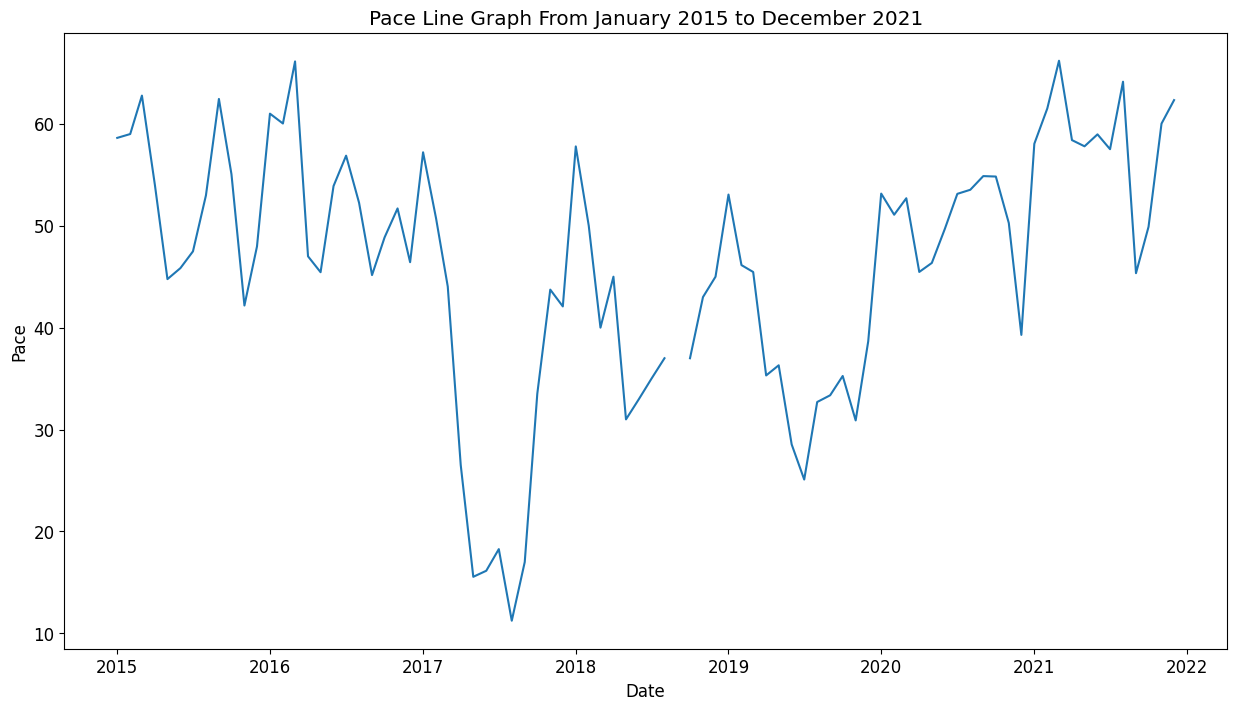

In [21]:
# Plot all the data from January 2015 to December 2021

# set figure size and font size
plt.figure(figsize=(15, 8))

# Increase the font size
plt.rcParams.update({'font.size': 12})

# Plot the Pace Data on a Line Graph
plt.plot(data['Date'], data['Pace'])

# Labelling the x and y axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pace', fontsize=12)

# Naming the Graph by putting a title
plt.title('Pace Line Graph From January 2015 to December 2021')
plt.show()

## 3.0 Data Properties

>* Understanding the properties of the data is important for selecting an appropriate forecasting method, as well as for interpreting the results of the forecasts. It is also important to visualize the data and perform diagnostics to ensure that the data properties are consistent with the assumptions of the forecasting method being used.

Some of these properties are:
>a. Trend: 

>A trend is the long-term movement in the data over time. This can be upward, downward, or flat. It is important to identify and model the trend, as it can impact the accuracy of the forecasts.

>b. Seasonality:

> Seasonality refers to patterns in the data that repeat at fixed intervals, such as daily, weekly, or yearly. Seasonality can be modeled using Fourier series or other methods, and can have a significant impact on the accuracy of the forecasts.

>c. Cyclicality: 

> Cyclicality refers to patterns in the data that repeat at irregular intervals. Cyclicality can be caused by factors such as business cycles, economic cycles, or other external factors, and can be more difficult to model than seasonality.

>d. Stationarity: 

> Stationarity refers to the statistical properties of the data remaining constant over time. Stationarity is important because many time series forecasting methods assume that the data is stationary. If the data is not stationary, it may need to be transformed before modeling.

>e. Autocorrelation: 

> Autocorrelation refers to the correlation between observations at different time points. Autocorrelation can be positive (meaning that nearby observations are similar) or negative (meaning that nearby observations are dissimilar). Autocorrelation can be modeled using autoregressive (AR) models.

>f. Residuals: 

> Residuals refer to the difference between the actual values and the predicted values. Residuals can be used to assess the accuracy of the model and to identify areas where the model may need to be improved.

## 3.1 Checking for the Assumptions of the ARIMA model
**Note**
>* Checking for data properties will help in finding out if it fits the assumptions of ARIMA model. 



## 3.2 Checking for Trends, Seasonality and Residuals

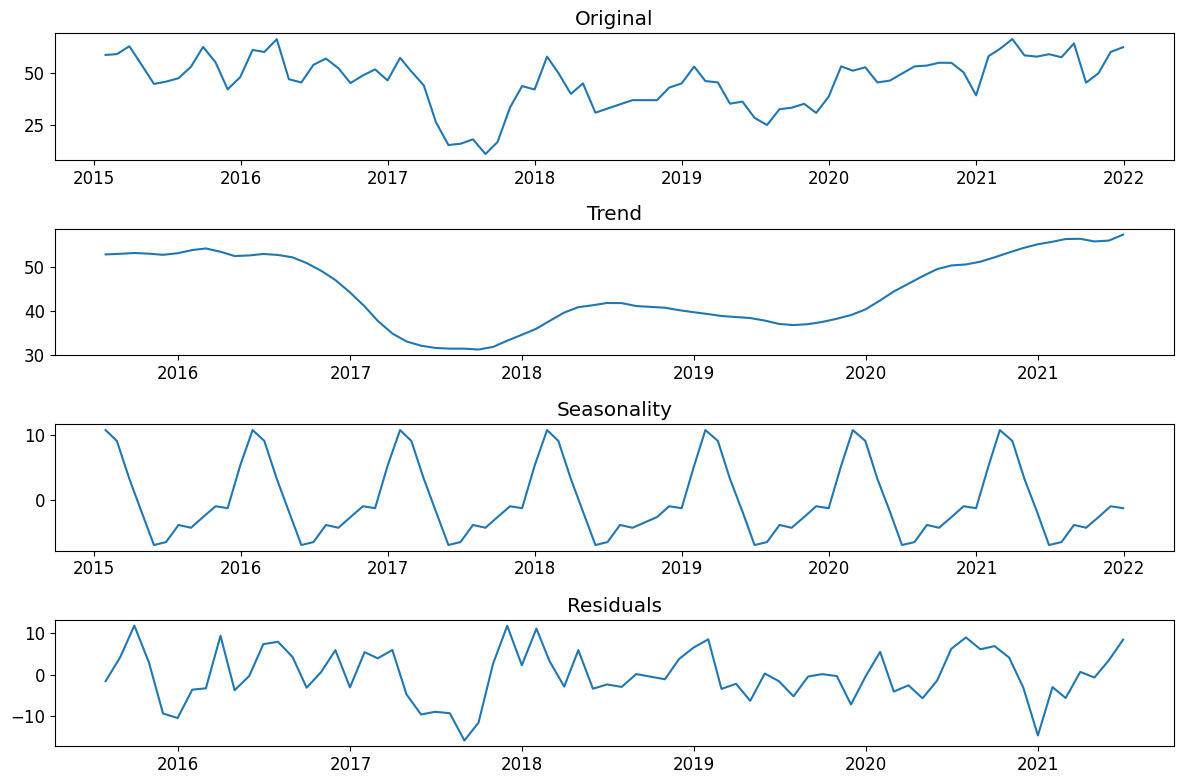

In [157]:
# import the relevant library
from statsmodels.tsa.seasonal import seasonal_decompose

# load and preprocess the data
series = pd.read_csv('cleaned_data.csv', index_col='Date', parse_dates=True, squeeze=True)
series = series.resample('M').mean().dropna()

# decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(series, model='additive', period=12)

# plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(series)
ax1.set_title('Original')
ax2.plot(result.trend)
ax2.set_title('Trend')
ax3.plot(result.seasonal)
ax3.set_title('Seasonality')
ax4.plot(result.resid)
ax4.set_title('Residuals')
plt.tight_layout()
plt.show()


**Observations**

>* Trend

From the above plot, there's evidence of the data having trend as theres consistent upward or downward movement of the curve. If the data shows a consistent upward or downward pattern, it likely has a trend.

>* Seasonality

There's evidence that the data has seasonality every year.

## 3.3 Checking for Stationarity

One of the assumptions of ARIMA model is that the data has to be stationary. Therefore, I'll check for the stationarity of the data. If the data is non-stationary, then I'll have to make it stationary in order to use the ARIMA model. 

I'll use the ADF (Augmented Dickey-Fuller) statistic and the p-value to check if the data is sationary or not. 
>a. The ADF is a test statistic for testing the null hypothesis that a unit root is present in a time series sample. A unit root is an indication that the time series is non-stationary, which means that its statistical properties (such as mean and variance) change over time.

Interpretation of the ADF statistic:
>* The more negative the ADF statistic, the stronger the evidence against the null hypothesis of a unit root, and the more likely that the time series is stationary.

>b. The p-value
The p-value is the probability of observing a test statistic as extreme as the one calculated from the data, assuming that the null hypothesis is true.

Interpretation of the p-value:
>* If the p-value is smaller than the significance level of 0.05. This means that the null hypothesis of a unit root is rejected at the 5% level of significance, and the time series is considered stationary.

In [22]:
# Previewing a copy of the cleaned data
df_copy = pd.read_csv('cleaned_data.csv') 
df_copy.head()

,Date,Pace
0,2015-01-01,58.62
1,2015-02-01,59.00
2,2015-03-01,62.77
3,2015-04-01,54.00
4,2015-05-01,44.76


In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


# Loading the cleaned data and transform to stationary
df = pd.read_csv('cleaned_data.csv', index_col='Date', parse_dates=True)
stationary_data = df.diff().dropna()

# Check for stationarity
result = adfuller(stationary_data['Pace'])
print('ADF Statistic:', result[0])
print('p-value:', "{:.20f}".format(result[1])) # Surpressing the scientific notations    


ADF Statistic: -8.850559329008227
p-value: 0.00000000000001577173


**Observation**

From the above results:
> a. the ADF statistic is -8.850559329008227, which is a very negative value. The more negative the ADF statistic, the stronger the evidence against the null hypothesis of a unit root. This means that the time series data is stationary.

> b. On the other hand, the p-value is 0.00000000000001577173, which is much smaller than the significance level of 0.05. Therefore, the null hypothesis of non-stationarity is rejected at the 5% level of significance, and the time series data for this assessment is considered stationary.

## 3.4 Autocorrelation
##### Choosing the Type of Time Series Model to use by checking for Autocorrelation and Partial Autocorrelation

Forecasting Pace for the 12 months of 2022 is a time series analysis. In order to forecast Pace for the 12 months of 2022, I'll have to look at the data properties in order to determine which type of time series models I'll use as there are different models one can use. Some of the common models are:
>1. ARIMA, 
>2. SARIMA, 
>3. exponential smoothing, 
>4. and neural networks.

I'll first check if the data fulfills ARIMA assumptions or SARIMA assumptioms. If the data fulfills SARIMA assumptions I'll build a base model for SARIMA instead of ARIMA because if there is a significant correlation at lag 12 (i.e., the twelfth lag), then a seasonal ARIMA model (SARIMA) may be more appropriate. But if the ACF plot shows significant autocorrelation at lag 1 (i.e., the first lag), then an AR(1) model may be appropriate. To check as to whether I'll build an ARIMA model or SARIMA, I'll check for auto-correlation using 20 lags then focus on the 1st and 12th lag as indicated above.

The ACF plot is a useful tool for identifying patterns in the data, such as seasonality, cyclicality, or random fluctuations. It can also help determine the appropriate order of an ARIMA model, based on the significant lags in the plot.

### 3.4.1. Checking for Autocorrelation (ACF)

The aim for checking for autocorrelation is to determine whether there's significant autocorrelation at the first lag (lag 1) or not by looking at the height of the first bar on the plot and compare it to the confidence intervals.

If the first bar on the ACF plot is higher than the confidence intervals and extends beyond them, then there is likely significant autocorrelation at the first lag. Conversely, if the first bar is not significantly different from the confidence intervals, then there may not be significant autocorrelation at the first lag. This means that you'll look for the bar that is heighest and is heigher than the confidence intervals which also extends beyond them.

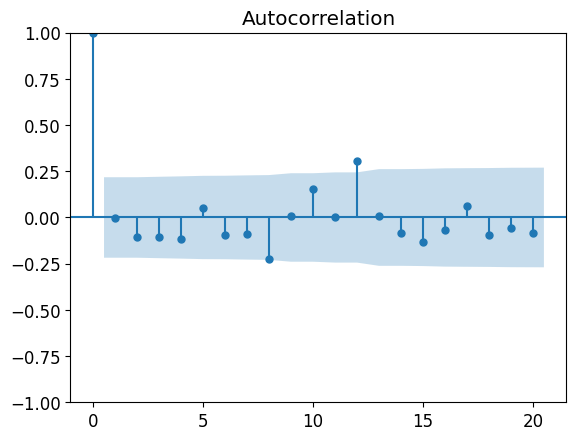

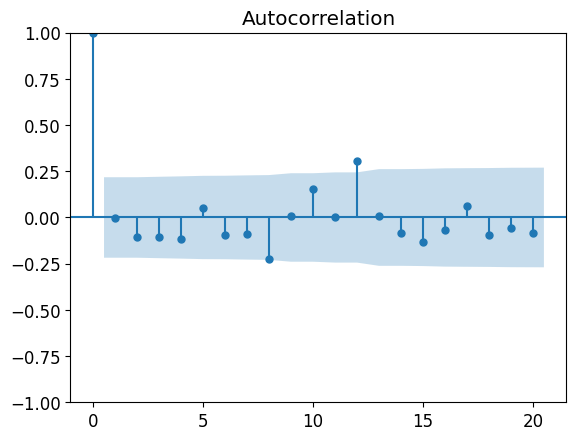

In [24]:
# Checking for autocorrelation
sm.graphics.tsa.plot_acf(stationary_data['Pace'], lags=20)

**Observation**
>* From the above output, the twelfth bar on the ACF plot is higher than the confidence intervals and extends beyond them, this therefore implies that there is likely significant autocorrelation at the twelfth lag. Thus SARIMA model will be appropriate.

### 3.4.2 Checking for Partial Autocorrelation (PACF)

The PACF measures the correlation between a time series and its lagged values, while controlling for the effects of all shorter lags. The PACF plot shows the strength of the correlation between the time series and its lags, up to a specified number of lags (in this case, 20).

In the plot, each bar represents the PACF value for a specific lag. The height of the bar represents the strength of the correlation between the time series and the corresponding lag, while the shaded area around the bar represents the confidence interval. If the bar extends beyond the confidence interval, then the correlation is considered significant at that lag.

By examining the PACF plot, we can determine the appropriate order of the autoregressive (AR) term in an ARIMA or SARIMA model. The order of the AR term is typically chosen based on the number of significant lags in the PACF plot. For example, if the PACF plot shows a significant spike at lag 1 and no significant spikes after that, then an AR(1) model may be appropriate. If the PACF plot shows significant spikes at lags 1 and 2, then an AR(2) model may be appropriate, and so on.

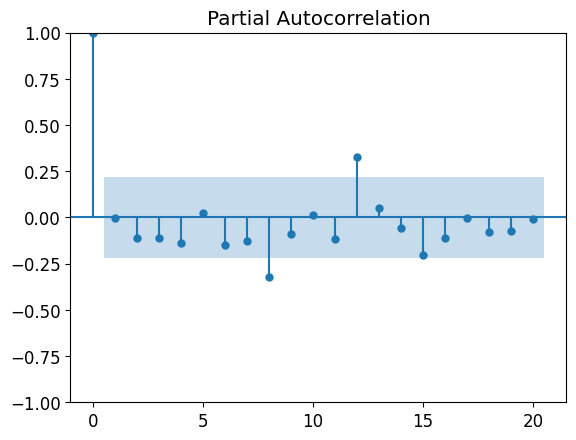

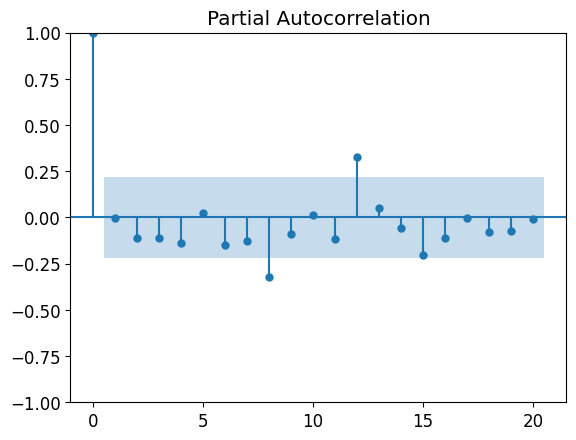

In [25]:
# Check partial autocorrelation
sm.graphics.tsa.plot_pacf(stationary_data['Pace'], lags=20)

**Observation**

>* From the above output, the PACF plot shows a significant spike at lag 12 and no significant spikes after that. This therefore implies that AR(12) model may be appropriate.

## 3.5 Checking for Cyclicality

**Note:**

> When checking for cyclicality, one should look for repetitive patterns in the pace, spikes in the rolling standard deviation, and a constant rolling mean.

**Interpretation of Presence of Cyclicality:**

>* Pace: This is the original data that shows the variation of pace over time. If there is a repetitive pattern in the pace, it indicates the presence of cyclicality.

>* Rolling Mean: This shows the long-term trend of the data by smoothing out short-term fluctuations. If the rolling mean remains constant over time, then there is no long-term trend in the data. However, if there is a gradual increase or decrease in the rolling mean, it indicates the presence of a trend in the data.

>* Rolling Standard Deviation: This measures the variability of the data over time. If the rolling standard deviation is constant over time, then there is no change in the variability of the data. However, if there are spikes in the rolling standard deviation, it indicates the presence of high variability in the data, which could be caused by cyclicality.

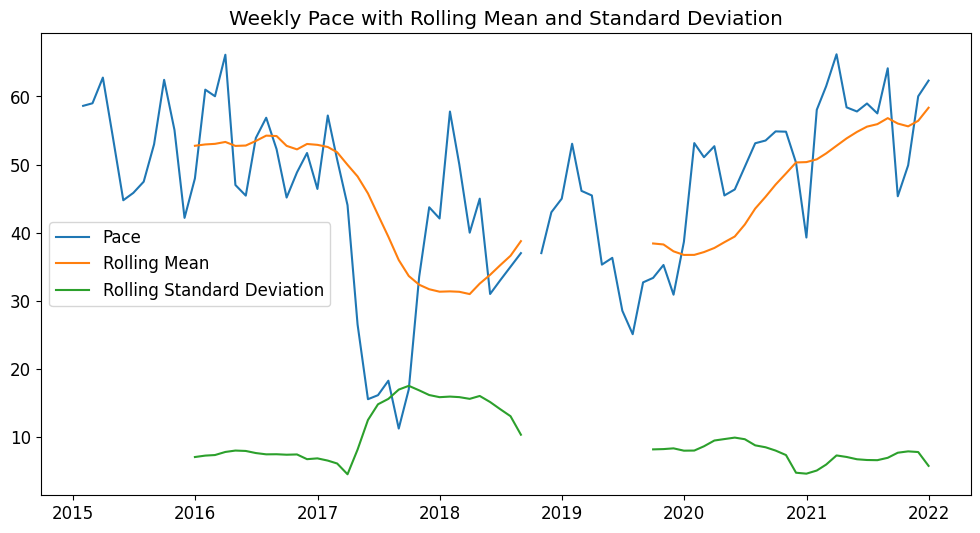

In [161]:
# Load the data
df = pd.read_csv('cleaned_data.csv', parse_dates=['Date'])
df.dropna(inplace=True)

# Set the date column as the index
df.set_index('Date', inplace=True)

# Resample the data by week
weekly_df = df.resample('M').mean()

# Calculate the rolling mean and rolling standard deviation with a window of 12 months (1 year)
rolling_mean = weekly_df['Pace'].rolling(window=12).mean()
rolling_std = weekly_df['Pace'].rolling(window=12).std()

# Plot the data and the rolling statistics
plt.figure(figsize=(12,6))
plt.plot(weekly_df['Pace'], label='Pace')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Monthly Pace with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


**Observations**

From the above graph, 
>a. there is a gradual increase and decrease in the rolling mean thus indicating the presence of trend in the data.

>b. there is a repetitive pattern in the pace which indicates the presence of cyclicality.

>c. there are spikes in the rolling standard deviation which indicates the presence of high variability in the data, which could be caused by cyclicality.

## 3.6 Choice of model

From the indication of existence of cyclicality in the data, then I'll use a time series model that takes into account seasonality or periodicity, such as Seasonal ARIMA (SARIMA) or Seasonal Decomposition of Time Series (STL). These models can help capture the cyclic patterns in the data and improve the accuracy of forecasts.

## 4.0 Model Acuracy

Model adequacy refers to the extent to which a time series forecasting model fits the data and makes accurate predictions. There are several methods for assessing the adequacy of a time series forecasting model, including:

>a. Residual Analysis: 

> Residual analysis involves examining the difference between the actual values and the predicted values (residuals) to assess the accuracy of the model. Ideally, the residuals should be normally distributed with zero mean and constant variance. If the residuals exhibit patterns or have non-constant variance, it may indicate that the model is inadequate.

>b. Forecast Evaluation: 

> Forecast evaluation involves comparing the predicted values to the actual values to assess the accuracy of the forecasts. Common metrics used for evaluating forecasts include mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean absolute percentage error (MAPE).

>c. Diagnostics: 

> Diagnostics involve examining the model assumptions and identifying any areas where the model may be inadequate. For example, if the data exhibits non-stationarity, it may indicate that the model assumptions are not appropriate and that the data may need to be transformed before modeling.

>d. Cross-Validation: 

> Cross-validation involves dividing the data into training and testing sets and evaluating the accuracy of the model on the testing set. This can help to identify any issues with overfitting or underfitting the data.

Overall, assessing the adequacy of a time series forecasting model is an iterative process that involves a combination of these methods. It is important to carefully evaluate the model and make adjustments as necessary to ensure that it is making accurate predictions and fitting the data well.

## Create Training and Testing data sets

In order to create the training and testing data sets, I'll want to use as much data as possible for training to ensure that the model is as accurate as possible and also reserve some data for testing to evaluate the performance of your model on unseen data. In this regard, I'll therefore use two different approaches as stated below:

> a. The First Approach

Because the data spans from January 2015 to December 2021, one approach could be to use the first 5 years (2015-2019) for training and the last 2 years (2020-2021) for testing. This will allow you to evaluate how well your model can forecast the future values based on historical data.

> b. The Second Approach

Use a rolling window approach, where I'll train the model on a certain number of months/years and test it on the following months/years. For example, I'll train the model on the first 12 months (January 2015 to December 2015) and test it on the next 12 months (January 2016 to December 2016), then slide the window forward by 12 months and repeat the process until the end of the dataset. This approach allows you to evaluate the performance of your model on different time periods and identify any changes in the data patterns over time.








#### 1. The First Approach

In [26]:
# # Preview the dataframe
df.head()

,Pace
Date,
2015-01-01,58.62
2015-02-01,59.00
2015-03-01,62.77
2015-04-01,54.00
2015-05-01,44.76


In [27]:
df_ = pd.read_csv('cleaned_data.csv')
df_.head(3)

,Date,Pace
0,2015-01-01,58.62
1,2015-02-01,59.00
2,2015-03-01,62.77


In [28]:
# Check the data types
df_.dtypes

Date     object
Pace    float64
dtype: object

In [29]:
# Splitting the data to train and test
train = df_.loc[df_['Date'] < '2020-01-01']
test = df_.loc[(df_['Date'] >= '2020-01-01') & (df_['Date'] < '2022-01-01')]

In [30]:
# Preview the dates for the training set 
train['Date']

0     2015-01-01
1     2015-02-01
2     2015-03-01
3     2015-04-01
4     2015-05-01
5     2015-06-01
6     2015-07-01
7     2015-08-01
8     2015-09-01
9     2015-10-01
10    2015-11-01
11    2015-12-01
12    2016-01-01
13    2016-02-01
14    2016-03-01
15    2016-04-01
16    2016-05-01
17    2016-06-01
18    2016-07-01
19    2016-08-01
20    2016-09-01
21    2016-10-01
22    2016-11-01
23    2016-12-01
24    2017-01-01
25    2017-02-01
26    2017-03-01
27    2017-04-01
28    2017-05-01
29    2017-06-01
30    2017-07-01
31    2017-08-01
32    2017-09-01
33    2017-10-01
34    2017-11-01
35    2017-12-01
36    2018-01-01
37    2018-02-01
38    2018-03-01
39    2018-04-01
40    2018-05-01
41    2018-06-01
42    2018-07-01
43    2018-08-01
44    2018-09-01
45    2018-10-01
46    2018-11-01
47    2018-12-01
48    2019-01-01
49    2019-02-01
50    2019-03-01
51    2019-04-01
52    2019-05-01
53    2019-06-01
54    2019-07-01
55    2019-08-01
56    2019-09-01
57    2019-10-01
58    2019-11-

In [31]:
# Checking the length of the data frame
len(df_)

84

In [32]:
# Checking the length of the train and test to confirm the total adds up to 84
len(train), len(test)

(60, 24)

## Implement ARIMA method

In [131]:
forecast_index = pd.date_range(start='2022-01-01', periods=12, freq='MS')
forecast_index

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [36]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
series.dropna(inplace=True)
# fit model
model = ARIMA(series, order=(12,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   Pace   No. Observations:                   83
Model:                ARIMA(12, 1, 0)   Log Likelihood                -273.472
Date:                Wed, 05 Apr 2023   AIC                            572.944
Time:                        22:10:09   BIC                            604.231
Sample:                    01-31-2015   HQIC                           585.505
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0692      0.099     -0.696      0.486      -0.264       0.126
ar.L2         -0.1808      0.114     -1.582      0.114      -0.405       0.043
ar.L3         -0.1372      0.123     -1.111      0.2

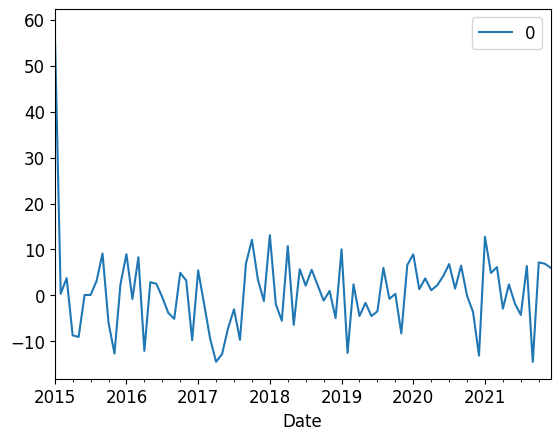

In [37]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)

residuals.plot()
pyplot.show()


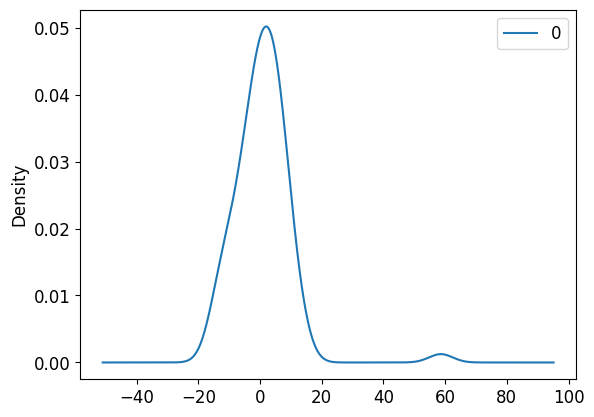

In [38]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


In [39]:
# summary stats of residuals
print(residuals.describe())

           0
count  83.00
mean    0.80
std     9.33
min   -14.45
25%    -4.35
50%     0.99
75%     5.66
max    58.62


**Observation**

From the above summary statistics, the mean value is 0.80. This implies that when the mean value of the residuals is close to zero, such as in this case where it is 0.80, it suggests that the ARIMA model is unbiased in its predictions. This means that, on average, the model is not over- or under-predicting the time series data.

In other words, the mean value of the residuals represents the overall tendency of the model to consistently over-predict or under-predict the observed data. A mean value of zero indicates that, overall, the model's predictions are close to the true values.

However, it's important to note that a mean value close to zero does not necessarily mean that the model is accurate in its predictions. Other diagnostic tests and statistical measures should be considered in conjunction with the residuals summary statistics to evaluate the overall performance of the ARIMA model.

## ARIMA Model Evaluation
The ARIMA() model is a popular time series forecasting model that stands for Autoregressive Integrated Moving Average. It is a model that combines three separate methods, namely autoregression (AR), differencing (I), and moving average (MA), to account for the autocorrelation, trend, and seasonality in time series data.

In the ARIMA() function, there are three parameters that specify the orders of each component of the model:

>i. p: the order of the autoregressive (AR) component, which specifies the number of lagged values of the dependent variable to include in the model.

>ii. d: the degree of differencing (I) to apply to the time series to make it stationary, which means that its mean and variance are constant over time.

>iii q: the order of the moving average (MA) component, which specifies the number of lagged forecast errors to include in the model.

Therefore, the values fitted in the ARIMA() model are the values of p, d, and q that optimize the model's performance in terms of minimizing the error between the predicted and actual values of the time series.


The values of p, d, and q as follows:

> i. p = 12: This indicates that you are using the previous 12 values of the time series as predictors for the current value.

> ii. d = 0 or 1: The choice of the differencing parameter (d) depends on whether the time series is already stationary or not. If the time series is already stationary, then d = 0. Otherwise, you need to apply differencing to make it stationary. A common approach is to use first-order differencing, which means that d = 1.

> iii. q = 0: Since you are only using the AR component to model the time series, the moving average (MA) component is not needed, so q = 0.

Therefore, the ARIMA() model specification for this scenario will be ARIMA(12,1,0).

In [41]:
# Split the data to train and test set
X = series.values
size = int(len(X) * 0.60)
train, test = X[0:size], X[size:len(X)]

In [44]:
# Length of the entire data points
len(X)

83

In [42]:
# Checking the length of the train set
len(train)

49

In [43]:
# Checking the length of the test set
len(test)

34

### Performing prediction on the test data which is of length 34. 

predicted=43.371496, expected=45.463000
predicted=40.538532, expected=35.312000
predicted=36.462939, expected=36.307000
predicted=32.639523, expected=28.544000
predicted=29.049845, expected=25.097000
predicted=25.336253, expected=32.705000
predicted=35.127613, expected=33.365000
predicted=33.225479, expected=35.259000
predicted=42.134000, expected=30.898000
predicted=31.601745, expected=38.664000
predicted=44.181146, expected=53.155000
predicted=48.765918, expected=51.083000
predicted=48.224793, expected=52.699000
predicted=46.008358, expected=45.468000
predicted=42.586408, expected=46.350000
predicted=45.662495, expected=49.681000
predicted=45.723945, expected=53.131000
predicted=52.427542, expected=53.532000
predicted=49.009554, expected=54.873000
predicted=53.915519, expected=54.829000
predicted=55.329751, expected=50.268000
predicted=53.480230, expected=39.291000
predicted=45.104259, expected=58.044000
predicted=57.152431, expected=61.508000
predicted=58.847645, expected=66.194000


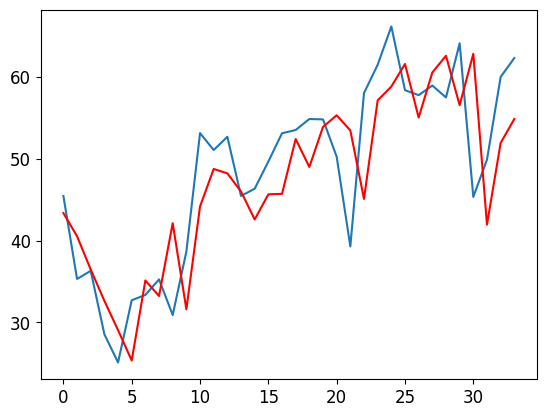

In [45]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True) 
series.dropna(inplace=True)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.60) #0.72
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(12,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Observation**

The graph above shows the test ouptput predictions for 34 data points. The blue graph shows the actual values for the test data while the red line shows the predicted values for the test data. 

The model has an RMSE of 6.84 which should be lower or closer to zero. Root Mean Squared Error (RMSE) metric is the square root of the MSE, and provides a measure of the magnitude of the error in the same units as the original data.



### Why the Choice of RMSE as a measure of model performance

>* There are various metrics that measure model performance such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error RMSE), Mean Absolute Percentage Error (MAPE), Symmetric Mean Absolute Percentage Error (SMAPE), R-Squared Error, Adjusted R-Squared error among others.

>* In time series analysis, adjusted R-squared may be used to assess the goodness of fit of regression models that incorporate time series data, particularly when multiple independent variables are included in the model. However, in this case, we only have one independent variable thus making RMSE be the best evaluation metrics for the model performance.

>* Also, considering that I aim to minimize prediction errors and obtain accurate forecasts of the pace column, then metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE) can be used. These metrics measure the difference between the predicted values and the actual values of the pace column, and can help in evaluating the accuracy of your forecasts.



### Why not MAE or MAPE as an Evaluation Metrics

There are several potential disadvantages of using Mean Absolute Error (MAE) or Mean Absolute Percentage Error (MAPE) over Root Mean Squared Error (RMSE) as evaluation metrics for time series models:

> 1. Ignores the magnitude of errors: 

>>> MAE and MAPE only consider the absolute differences between predicted and actual values, without taking into account the magnitude of the errors. This means that large errors and small errors are treated equally, which may not be desirable in some cases.

> 2. Not suitable for some applications: 

>>> MAE and MAPE may not be suitable for certain applications where accurate predictions are critical, such as in finance or medicine. In these cases, even small errors can have significant consequences, and RMSE may be a better metric to use.

> 3. Susceptible to outliers: 

>>> MAE and MAPE can be sensitive to outliers, since they are based on the absolute differences between predicted and actual values. This means that a few extreme values in the dataset can significantly affect the overall error metric, which may not be representative of the model's overall performance.

> 4. Doesn't penalize large errors enough: 

>> MAE and MAPE treat all errors equally, regardless of their magnitude. This means that large errors are not penalized enough, which can result in models that are not robust to outliers or extreme values.

In contrast, RMSE takes into account the magnitude of errors and penalizes larger errors more heavily. This can make it a more suitable metric for applications where accurate predictions are critical, and where outliers or extreme values may be present in the dataset. 



In [47]:
# Making a copy of the df_ data frame
dfcopy = df_.copy(deep=True)
dfcopy.dropna(inplace=True)

In [48]:
# Checking the shape of the dfcopy data frame
dfcopy.shape

(83, 2)

### Finding the Best Model Hyperparameters using Grid Search

In [49]:
# Performing Grid Search
# Splitting the data to train and test
train = dfcopy.loc[dfcopy['Date'] < '2020-01-01']
test = dfcopy.loc[(dfcopy['Date'] >= '2020-01-01') & (dfcopy['Date'] < '2022-01-01')]

def evaluate_arima_model(train, test, arima_order):
    # prepare data
    history = train.values.tolist()
    predictions = []
    # walk-forward validation
    for i in range(len(test)):
        # fit model and make forecast for history
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next iteration
        history.append(test[i])
    # calculate out of sample error
    error = sqrt(mean_squared_error(test, predictions))
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

 

series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.dropna(inplace=True)
# evaluate parameters
p_values = [0,1,2,3,4,5,6,7,8,9,10,11,12]
d_values = [0,1]
q_values = [0,1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [50]:
# Previewing History details
history = train.values.tolist()
history

[['2015-01-01', 58.623],
 ['2015-02-01', 59.0],
 ['2015-03-01', 62.772],
 ['2015-04-01', 54.0],
 ['2015-05-01', 44.763],
 ['2015-06-01', 45.84358],
 ['2015-07-01', 47.489],
 ['2015-08-01', 52.98],
 ['2015-09-01', 62.442],
 ['2015-10-01', 55.061],
 ['2015-11-01', 42.174],
 ['2015-12-01', 47.966],
 ['2016-01-01', 61.0],
 ['2016-02-01', 60.033],
 ['2016-03-01', 66.125],
 ['2016-04-01', 47.0],
 ['2016-05-01', 45.441],
 ['2016-06-01', 53.899],
 ['2016-07-01', 56.877],
 ['2016-08-01', 52.254],
 ['2016-09-01', 45.159],
 ['2016-10-01', 48.858],
 ['2016-11-01', 51.7],
 ['2016-12-01', 46.423],
 ['2017-01-01', 57.207],
 ['2017-02-01', 50.734],
 ['2017-03-01', 44.035],
 ['2017-04-01', 26.522],
 ['2017-05-01', 15.553],
 ['2017-06-01', 16.144],
 ['2017-07-01', 18.269],
 ['2017-08-01', 11.243],
 ['2017-09-01', 17.0],
 ['2017-10-01', 33.518],
 ['2017-11-01', 43.733],
 ['2017-12-01', 42.084],
 ['2018-01-01', 57.785],
 ['2018-02-01', 50.0],
 ['2018-03-01', 40.0],
 ['2018-04-01', 45.0],
 ['2018-05-01', 3

predicted=43.371496, expected=45.463000
predicted=40.538532, expected=35.312000
predicted=36.462939, expected=36.307000
predicted=32.639523, expected=28.544000
predicted=29.049845, expected=25.097000
predicted=25.336253, expected=32.705000
predicted=35.127613, expected=33.365000
predicted=33.225479, expected=35.259000
predicted=42.134000, expected=30.898000
predicted=31.601745, expected=38.664000
predicted=44.181146, expected=53.155000
predicted=48.765918, expected=51.083000
predicted=48.224793, expected=52.699000
predicted=46.008358, expected=45.468000
predicted=42.586408, expected=46.350000
predicted=45.662495, expected=49.681000
predicted=45.723945, expected=53.131000
predicted=52.427542, expected=53.532000
predicted=49.009554, expected=54.873000
predicted=53.915519, expected=54.829000
predicted=55.329751, expected=50.268000
predicted=53.480230, expected=39.291000
predicted=45.104259, expected=58.044000
predicted=57.152431, expected=61.508000
predicted=58.847645, expected=66.194000


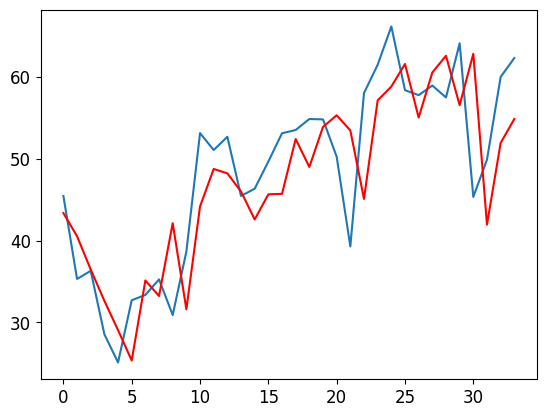

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# load the data and prepare it for modeling
series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.dropna(inplace=True)
# series.index = series.index.to_period('M')

# convert period index to datetime index
# series.index = series.index.to_timestamp()

# split into train and test sets
X = series.values
size = int(len(X) * 0.60) #0.72
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(12,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


## 5.0 Forecast Pace for 12 Months in 2022

The forecast is done by predicting Pace values for 2022.

In [52]:
# import necessary libraries
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

p = 12
d = 1
q = 1

# load the data and prepare it for modeling
series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.dropna(inplace=True)
series.index = series.index.to_period('M')

# fit the ARIMA model with the best configuration found from grid search
model = ARIMA(series, order=(12, 1, 1))  # replace with best ARIMA configuration
model_fit = model.fit()

# generate the 12-month forecast for 2022
forecast_values = model_fit.forecast(steps=13)

# print the forecasted values
print(forecast_values)


2021-12   68.53
2022-01   65.97
2022-02   66.70
2022-03   65.30
2022-04   66.03
2022-05   66.08
2022-06   60.22
2022-07   62.77
2022-08   56.68
2022-09   57.48
2022-10   62.83
2022-11   63.41
2022-12   66.08
Freq: M, Name: predicted_mean, dtype: float64


predicted=43.299004, expected=45.463000
predicted=40.522551, expected=35.312000
predicted=36.423538, expected=36.307000
predicted=32.684522, expected=28.544000
predicted=29.015923, expected=25.097000
predicted=25.351197, expected=32.705000
predicted=35.112614, expected=33.365000
predicted=33.234359, expected=35.259000
predicted=42.079635, expected=30.898000
predicted=31.748484, expected=38.664000
predicted=44.128058, expected=53.155000
predicted=48.868890, expected=51.083000
predicted=47.993129, expected=52.699000
predicted=45.934843, expected=45.468000
predicted=42.477390, expected=46.350000
predicted=45.704641, expected=49.681000
predicted=45.667580, expected=53.131000
predicted=52.369620, expected=53.532000
predicted=49.121653, expected=54.873000
predicted=53.928414, expected=54.829000
predicted=55.385952, expected=50.268000
predicted=53.505267, expected=39.291000
predicted=45.315297, expected=58.044000
predicted=57.556917, expected=61.508000
predicted=58.845538, expected=66.194000


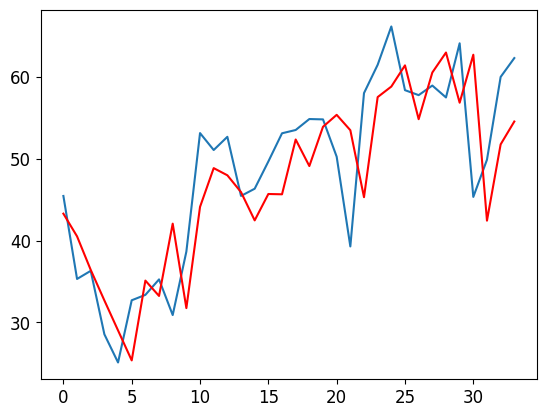

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# load the data and prepare it for modeling
series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.dropna(inplace=True)
# series.index = series.index.to_period('M')

# convert period index to datetime index
# series.index = series.index.to_timestamp()

# split into train and test sets
X = series.values
size = int(len(X) * 0.60) #0.72
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(12,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



In [54]:
# load the data and prepare it for modeling
series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.dropna(inplace=True)
series.index = series.index.to_period('M')

# fit the ARIMA model with the best configuration found from grid search
model = ARIMA(series, order=(12, 1, 1))  # replace with best ARIMA configuration
model_fit = model.fit()

# generate the 12-month forecast for 2022 and 2023
forecast_values = model_fit.forecast(steps=24)

# print the forecasted values
print(forecast_values)

2021-12   68.53
2022-01   65.97
2022-02   66.70
2022-03   65.30
2022-04   66.03
2022-05   66.08
2022-06   60.22
2022-07   62.77
2022-08   56.68
2022-09   57.48
2022-10   62.83
2022-11   63.41
2022-12   66.08
2023-01   64.86
2023-02   65.42
2023-03   65.57
2023-04   65.58
2023-05   65.78
2023-06   61.51
2023-07   62.06
2023-08   60.63
2023-09   60.70
2023-10   63.30
2023-11   63.21
Freq: M, Name: predicted_mean, dtype: float64


**Note**

>* The results obtained has an RMSE of 6.81 which is high. A good RMSE should be close to 0. To improve the model performance, I performed grid search so that I could obtain better hyperparameters for the model. However, the output of the grid search indicated that there was no best model. Which is unusual, I therefore needed to plot the residuals values.

>* The plot of the residuals shows the differences between the actual values and the predicted values of the time series. The ACF plot and PACF plot of the residuals provide information about the correlation structure of these differences.

>* ACF plot: The ACF plot (Autocorrelation Function) shows the correlation of the residuals with their lagged values. The correlation between the residuals and their past values is an indication that there may be information in the data that is not captured by the model. Specifically, if there are significant spikes in the ACF plot at certain lags, it suggests that the residuals at those lags are not independent and there may be some autocorrelation remaining in the residuals.

>* PACF plot: The PACF plot (Partial Autocorrelation Function) shows the correlation of the residuals with their lagged values after removing the effect of intermediate lags. In other words, it shows the direct relationship between the residuals at a given lag and the residuals at lag 0, controlling for the effect of all intermediate lags. The PACF plot can help identify the order of the AR component of the ARIMA model, which is the number of lagged residuals that are significant in the plot.

In general, a good ARIMA model should have residuals that are uncorrelated with each other and have zero mean. Therefore, if the ACF and PACF plots of the residuals show significant spikes at certain lags, it may indicate that the model can be improved by adjusting the order of the AR, MA, or differencing components, or by adding additional exogenous variables to the model.

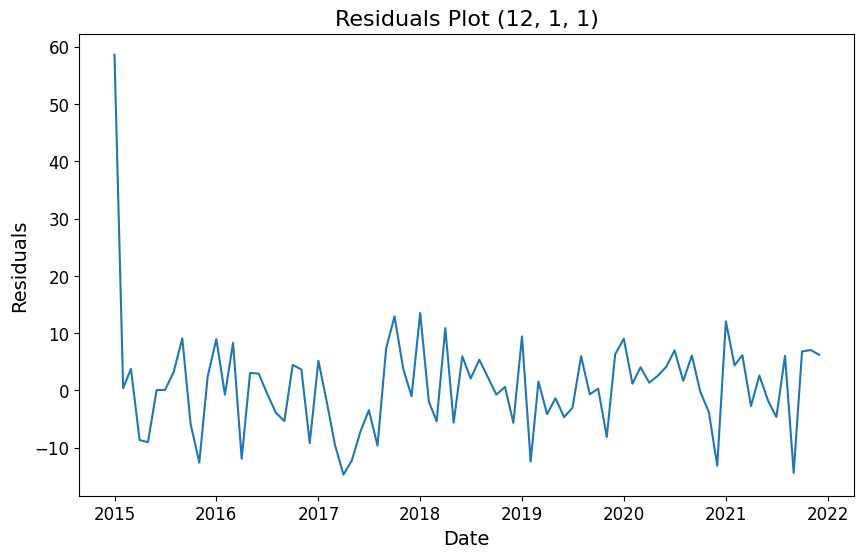

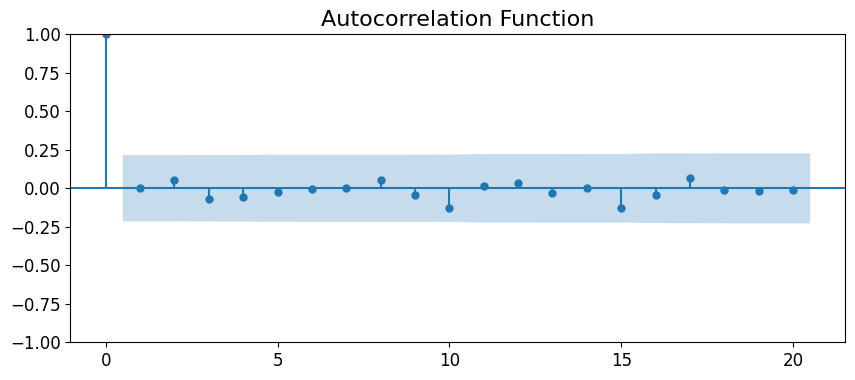

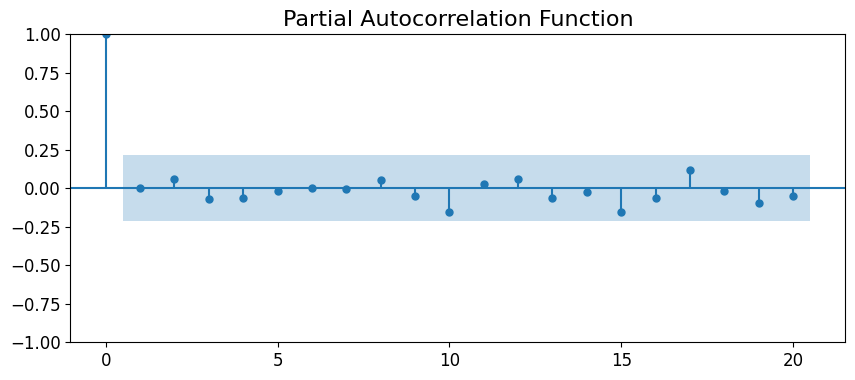

In [285]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Fit the ARIMA model and get residuals
model = ARIMA(series, order=(p, d, q))
results = model.fit()
residuals = results.resid

# Plot the residuals
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(residuals)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.set_title(f'Residuals Plot ({p}, {d}, {q})', fontsize=16)
plt.show()

# Plot the ACF of residuals
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(residuals, ax=ax)
ax.set_title('Autocorrelation Function', fontsize=16)
plt.show()

# Plot the PACF of residuals
fig, ax = plt.subplots(figsize=(10,4))
plot_pacf(residuals, ax=ax)
ax.set_title('Partial Autocorrelation Function', fontsize=16)
plt.show()


### Interpretation of the Autocorrelation Correlation Function (ACF) residuals graph Ploted above

>* In the ACF plot of the residuals, the y-axis represents the correlation coefficient between the residuals and their past values at different lags (x-axis). The correlation coefficient measures the strength and direction of the linear relationship between two variables.

>* If there is significant correlation between the residuals and their past values at certain lags, this will be reflected by significant spikes in the ACF plot at those lags. In other words, if the magnitude of the ACF value at a certain lag is above the confidence interval (determined by the dashed lines on the plot), then it suggests there is a significant correlation between the residuals at that lag and the residuals at previous lags.

>* Note that in a well-fitted ARIMA model, the residuals should be uncorrelated and should not have any significant spikes in the ACF plot. If there are significant spikes, it suggests that there may be some information in the data that is not being captured by the model and there may be a need to adjust the model or consider other factors that are influencing the data.

**Conclusion**

From the ACF graph, there are no lags or spikes above the confidence level. Therefore, there's no significant correlation between the residuals. This indicates that all the information in the data have been captured.







### Interpretation of the above Partial Autocorrelation Function (PACF) resisiduals plot

>* The PACF (Partial Autocorrelation Function) plot of the residuals can help identify the order of the AR (AutoRegressive) component of the ARIMA model.

>* The PACF plot shows the correlation between the residuals at a given lag and the residuals at lag 0, controlling for the effect of all intermediate lags. The PACF plot can therefore help to identify the number of lagged residuals that are significant in the plot, which corresponds to the order of the AR component.

>* If the PACF plot of the residuals shows significant spikes at certain lags and these spikes are within the confidence interval (determined by the dashed lines on the plot), then this suggests that there is a significant correlation between the residuals at those lags and the residuals at lag 0. The lag order corresponding to the last significant spike in the PACF plot can be taken as the order of the AR component of the ARIMA model.

>* It is important to note that the order of the AR component cannot be determined solely based on the PACF plot. The order of the AR component should be chosen in conjunction with the results of other diagnostic tests, such as the ACF plot, Ljung-Box test, and other model selection criteria, such as AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion).

In view of this, I'll obtain results for Ljung-Box test, and other model selection criteria, such as AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to assist shedding more light on the model performance.

**Conclusion**

From the PACF graph, there are significant spikes at certain lags and these spikes are within the confidence interval. This indicate that there's a significant correlation between the residuals at those lags and the residuals at lag 0.

In [58]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

series = read_csv('cleaned_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
series.dropna(inplace=True)
# fit model
model = ARIMA(series, order=(12,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   Pace   No. Observations:                   83
Model:                ARIMA(12, 1, 1)   Log Likelihood                -273.262
Date:                Wed, 05 Apr 2023   AIC                            574.524
Time:                        22:55:11   BIC                            608.218
Sample:                    01-31-2015   HQIC                           588.052
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0693      0.349      0.199      0.843      -0.615       0.754
ar.L2         -0.1663      0.114     -1.460      0.144      -0.389       0.057
ar.L3         -0.1126      0.127     -0.885      0.3

**Explanation**

Below are the interpretations of the above output:

>* "sigma2": This value of 44.4506 represents the estimated variance of the errors or residuals of the model. It is common to report the variance of the errors as sigma squared in many statistical models.

>* "Ljung-Box (L1) (Q)": This is a test for autocorrelation in the residuals of the model up to lag 1. In this case, the value of 0.01 suggests that there is little evidence of autocorrelation in the residuals.

>* "Prob(Q)": The p-value for the Ljung-Box test is 0.93, which suggests that there is no significant evidence of autocorrelation in the residuals.

>* "Heteroskedasticity (H)": This is a test for heteroskedasticity in the residuals of the model. In this case, the value of 0.96 suggests that there is little evidence of heteroskedasticity in the residuals.

>* "Prob(H)": The p-value for the heteroskedasticity test is 0.91, which suggests that there is no significant evidence of heteroskedasticity in the residuals.

>* "Jarque-Bera (JB)": This is a test for normality of the residuals. In this case, the value of 2.23 and p-value of 0.33 suggest that the residuals are approximately normally distributed.

>* "Skew": The value of -0.31 indicates that the distribution of residuals is slightly skewed to the left.

>* "Kurtosis": The value of 2.48 indicates that the distribution of residuals has relatively low kurtosis, which means that it is less peaked than a normal distribution.

**In Summary**

>a. The above output suggests that an ARIMA(12, 1, 1) model has been fit to a dataset with 83 observations of the dependent variable "Pace". The ARIMA model is a popular time series model that can capture the temporal patterns in the data. The (12, 1, 1) in the model notation refers to the number of autoregressive terms, the number of differences applied to the series, and the number of moving average terms, respectively.

>b. The negative value of the log-likelihood (-273.262) suggests that the model fits the data reasonably well. A lower value of the log-likelihood would indicate a worse fit. The AIC (Akaike Information Criterion) of 574.524 suggests that this model is a relatively good fit for the data compared to other possible models. The BIC (Bayesian Information Criterion) of 608.218 and the HQIC (Hannan-Quinn Information Criterion) of 588.052 also provide measures of model fit that can be used to compare this model to other possible models.

>* The "opg" covariance type indicates that the model uses the OPG (optimal parameters' gradient) method to estimate the covariance matrix of the coefficients. This is a method that can provide more accurate estimates of the covariance matrix when the sample size is small.

### Using Normalized Data to improve on model perfomance

predicted=-0.236048, expected=-0.067553
predicted=-0.464153, expected=-0.885166
predicted=-0.792476, expected=-0.805024
predicted=-1.100432, expected=-1.430295
predicted=-1.389566, expected=-1.707934
predicted=-1.688665, expected=-1.095147
predicted=-0.900016, expected=-1.041987
predicted=-1.053172, expected=-0.889435
predicted=-0.335703, expected=-1.240692
predicted=-1.184021, expected=-0.615179
predicted=-0.170841, expected=0.552000
predicted=0.198563, expected=0.385111
predicted=0.154894, expected=0.515272
predicted=-0.023603, expected=-0.067150
predicted=-0.299307, expected=0.003891
predicted=-0.051604, expected=0.272187
predicted=-0.046485, expected=0.550067
predicted=0.493390, expected=0.582366
predicted=0.218068, expected=0.690377
predicted=0.613304, expected=0.686833
predicted=0.727184, expected=0.319466
predicted=0.578152, expected=-0.564677
predicted=-0.096476, expected=0.945785
predicted=0.873985, expected=1.224793
predicted=1.010547, expected=1.602228
predicted=1.232548, ex

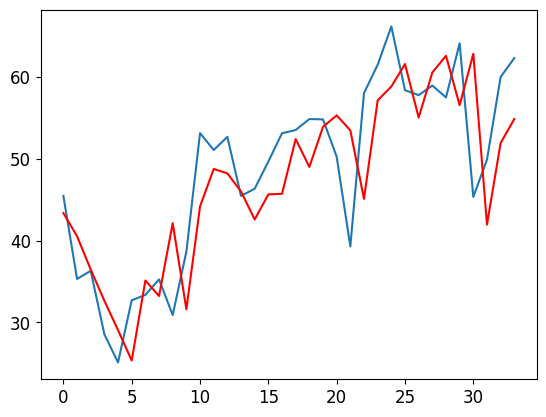

In [78]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# define a function to load the data
def load_data(filename):
    series = read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)
    series.dropna(inplace=True)
    return series

# define a function to normalize the data
def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data.values.reshape(-1, 1))
    return scaler, Series(normalized_data[:, 0], index=data.index)

# load the data
filename = 'cleaned_data.csv'
series = load_data(filename)

# normalize the data
scaler, normalized_series = normalize_data(series)

# split the data into train and test sets
X_ = normalized_series.values
size_ = int(len(X_) * 0.6)
train_, test_ = X_[0:size_], X_[size_:len(X_)]

# train and evaluate the ARIMA model
history_ = [x for x in train_]
predictions = []
for t in range(len(test_)):
    model = ARIMA(history_, order=(12, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_[t]
    history_.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate the forecasts
# convert predictions to a numpy array
predictions = np.array(predictions)

# reshape predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

test_ = scaler.inverse_transform(test_.reshape(-1, 1))
rmse = sqrt(mean_squared_error(test_, predictions))
print('Test RMSE: %.3f' % rmse)

# plot the forecasts against the actual outcomes
pyplot.plot(test_)
pyplot.plot(predictions, color='red')
pyplot.show()


predicted=-0.234600, expected=-0.067144
predicted=-0.461369, expected=-0.879817
predicted=-0.787669, expected=-0.800159
predicted=-1.093781, expected=-1.421653
predicted=-1.381176, expected=-1.697614
predicted=-1.678464, expected=-1.088530
predicted=-0.894596, expected=-1.035691
predicted=-1.046832, expected=-0.884060
predicted=-0.333671, expected=-1.233195
predicted=-1.176866, expected=-0.611462
predicted=-0.169810, expected=0.548665
predicted=0.197341, expected=0.382784
predicted=0.153958, expected=0.512158
predicted=-0.023473, expected=-0.066744
predicted=-0.297500, expected=0.003867
predicted=-0.051291, expected=0.270542
predicted=-0.046198, expected=0.546743
predicted=0.490408, expected=0.578847
predicted=0.216749, expected=0.686205
predicted=0.609596, expected=0.682683
predicted=0.722789, expected=0.317536
predicted=0.574658, expected=-0.561265
predicted=-0.095892, expected=0.940070
predicted=0.868725, expected=1.217393
predicted=1.004439, expected=1.592546
predicted=1.225100, ex

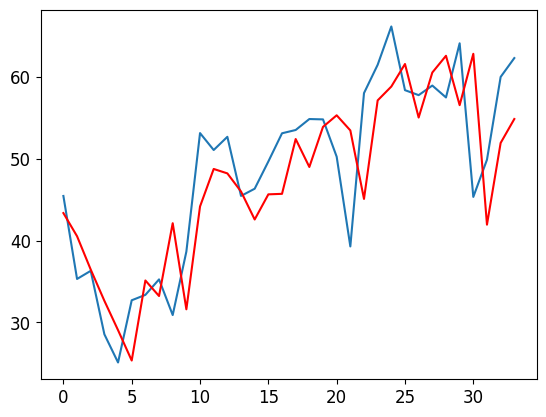

In [77]:
from pandas import read_csv
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# define a function to load the data
def load_data(filename):
    series = read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)
    series.dropna(inplace=True)
    return series

# define a function to normalize the data
def normalize_data(data):
    data_mean = data.mean()
    data_std = data.std()
    normalized_data = (data - data_mean) / data_std
    return Series(normalized_data, index=data.index), data_mean, data_std

# load the data
filename = 'cleaned_data.csv'
series = load_data(filename)

# normalize the data
normalized_series, data_mean, data_std = normalize_data(series)

# split the data into train and test sets
X_1 = normalized_series.values
size = int(len(X_1) * 0.6)
train, test_2 = X_1[0:size], X_1[size:len(X_1)]

# train and evaluate the ARIMA model
history = [x for x in train]
predictions_ = []
for t in range(len(test_2)):
    model = ARIMA(history, order=(12, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_.append(yhat)
    obs = test_2[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate the forecasts
# convert predictions to a numpy array
predictions_ = np.array(predictions_)

# reshape predictions
predictions_ = (predictions_ * data_std) + data_mean

test_2 = (test_2 * data_std) + data_mean
rmse = sqrt(mean_squared_error(test_2, predictions_))
print('Test RMSE: %.3f' % rmse)

# plot the forecasts against the actual outcomes
pyplot.plot(test_2)
pyplot.plot(predictions_, color='red')
pyplot.show()


**Observation** 

Performing scaling has improved the model performance slightly. I'll try performing predictions using Prophet and see how the model performs.

### Predicting Using Prophet

In [81]:
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 3.1 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [98]:
df_prophet = df.rename(columns={'Date':'ds', 'Pace':'y'})
df_prophet

,y
Date,
2015-01-01,58.62
2015-02-01,59.00
2015-03-01,62.77
2015-04-01,54.00
2015-05-01,44.76
...,...
2021-08-01,64.13
2021-09-01,45.35
2021-10-01,49.90


In [91]:
df_prophet = df.rename(columns={'Date':'ds', 'Pace':'y'}, inplace=True)
df_prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5pjf94g/whv7etbo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5pjf94g/dm2_sx6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99000', 'data', 'file=/tmp/tmpq5pjf94g/whv7etbo.json', 'init=/tmp/tmpq5pjf94g/dm2_sx6c.json', 'output', 'file=/tmp/tmpq5pjf94g/prophet_modelej_twwwg/prophet_model-20230406011154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test RMSE: 12.240


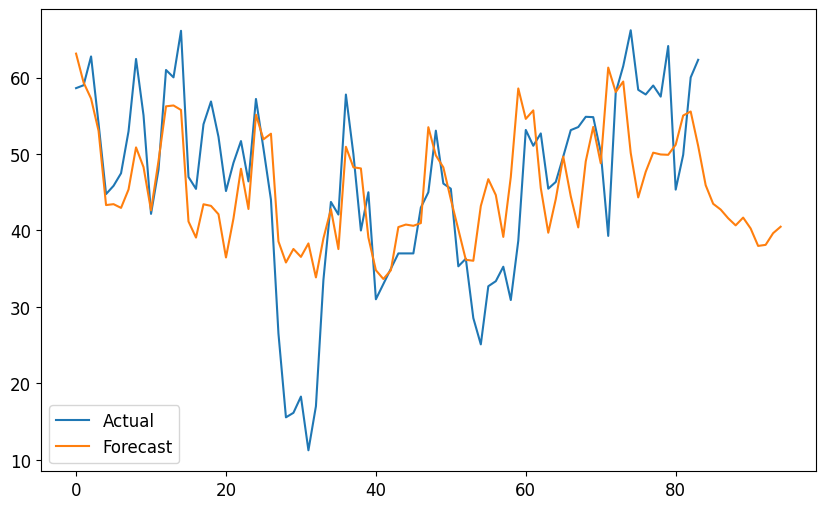

In [118]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from pandas import to_datetime

# define a function to load the data
def load_data(filename):
    df = pd.read_csv(filename, parse_dates=['Date']) #, index_col='Date')
    df.dropna(inplace=True)
    return df

# load the data
filename = 'cleaned_data.csv'
df = pd.read_csv(filename, parse_dates=['Date']) #, index_col='Date')
df.dropna(inplace=True)

# create a new dataframe with the 'ds' and 'y' columns required by Prophet
df_prophet = df.rename(columns={'Date':'ds', 'Pace':'y'})

# prepare expected column names
df_prophet['ds'] = to_datetime(df_prophet['ds'])

# fit the Prophet model
model = Prophet(yearly_seasonality=True,weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

# make predictions
future = model.make_future_dataframe(periods=12) # predict for one year
forecast = model.predict(future)

# evaluate the forecasts
test = df['Pace'][-83:]
predictions = forecast['yhat'][-83:]
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot the forecasts against the actual outcomes
fig, ax = plt.subplots(figsize=(10, 6))
df['Pace'].plot(label='Actual', ax=ax)
forecast['yhat'].plot(label='Forecast', ax=ax)
plt.legend()
plt.show()


**Observation**

The reults obtained from prohet model has an RMSE of 12.4 which is worse than the previous results obtained from the ARIMA model. To further improve on the model performance one can consider building a deep learning model.

### Creating a Deep Learning Model ousing LSTM

Epoch 1/100
2/2 [==============================] - 3s 23ms/step - loss: 0.2452
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 0.4170
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1814
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 0.1932
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1370
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0653
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0633
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0507
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0465
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0541
Epoch 11/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0499
Epoch 12/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0428
Epoch 13/100
2/2 [==============================]

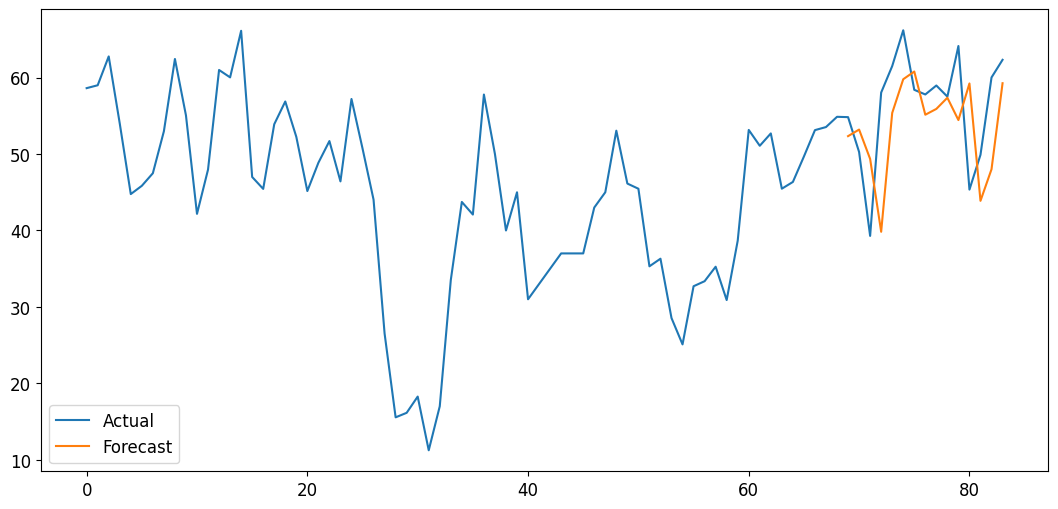

In [147]:
# Building an LSTM Model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
# from tensorflow.keras.metrics import RootMeanSquaredError
from math import sqrt
import matplotlib.pyplot as plt

# define a function to load the data
def load_data(filename):
    df = pd.read_csv(filename, parse_dates=['Date'])
    df.dropna(inplace=True)
    return df

# load the data
filename = 'cleaned_data.csv'
df = load_data(filename)

# scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Pace']])

# prepare the data for LSTM
lookback = 12
X, y = [], []
for i in range(len(data)-lookback):
    X.append(data[i:i+lookback])
    y.append(data[i+lookback])
X, y = np.array(X), np.array(y)

# split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(lookback, 1)))
model.add(Dense(1, activation='linear'))
# model.add(Dense(1)) #, activation='tanh'))
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizer)

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# make predictions on the test set
predictions = model.predict(X_test)

# invert the scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot the forecasts against the actual outcomes
fig, ax = plt.subplots(figsize=(13, 6))
df['Pace'].plot(label='Actual', ax=ax)
ax.plot(df.index[train_size+lookback:], predictions, label='Forecast')
plt.legend()
plt.show()


In [149]:
# create input sequence for predicting next 24 months
last_sequence = X_test[-1]
input_sequence = np.expand_dims(last_sequence, axis=0)
predicted_values = []

# make predictions for next 24 months
for i in range(24):
    # make prediction for next month
    predicted_value = model.predict(input_sequence)
    predicted_values.append(predicted_value[0][0])
    
    # update input sequence with predicted value
    input_sequence = np.concatenate([input_sequence[:, 1:, :], np.expand_dims(predicted_value, axis=1)], axis=1)

# invert the scaling
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# print the forecasted values
print(predicted_values)

1/1 [==============================] - 0s 46ms/step
[[59.27]
 [56.9 ]
 [53.39]
 [52.62]
 [52.69]
 [51.77]
 [50.04]
 [48.67]
 [48.19]
 [48.11]
 [48.2 ]
 [48.29]
 [48.37]
 [48.49]
 [48.55]
 [48.52]
 [48.37]
 [48.12]
 [47.84]
 [47.57]
 [47.36]
 [47.19]
 [47.1 ]
 [47.05]]


### Prediction Results From LSTM Model

In [151]:
# Predict the next 24 months
forecast = []
last_data = X_train[-1]
for i in range(24):
    next_pred = model.predict(last_data.reshape(1, lookback, 1))
    last_data = np.append(last_data[1:], next_pred)
    forecast.append(next_pred[0][0])

# invert the scaling
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# generate the dates for the forecasted values
last_date = df['Date'].iloc[-1]
dates = [last_date + pd.DateOffset(months=i+1) for i in range(24)]

# print the forecasted values with dates
forecast_df = pd.DataFrame({'Date': dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)
print(forecast_df)


1/1 [==============================] - 0s 24ms/step
            Forecast
Date                
2022-01-01     50.54
2022-02-01     48.80
2022-03-01     48.13
2022-04-01     48.00
2022-05-01     47.53
2022-06-01     46.78
2022-07-01     46.38
2022-08-01     46.46
2022-09-01     46.86
2022-10-01     47.26
2022-11-01     47.53
2022-12-01     47.68
2023-01-01     47.73
2023-02-01     47.70
2023-03-01     47.58
2023-04-01     47.40
2023-05-01     47.18
2023-06-01     46.99
2023-07-01     46.85
2023-08-01     46.78
2023-09-01     46.77
2023-10-01     46.80
2023-11-01     46.85
2023-12-01     46.92


**Observations**

> Looking at the results from the LSTM model, the RMSE shows an indication that the predictions were not the best. The LSTM model is one of the best models when it comes to time series analysis but the below conditions need to have been met for the model to produce better results:

>* Data availability and quality: 

> LSTMs require a large amount of input data to learn patterns and make accurate predictions. The quality of data is also important, as low-quality data can result in poor predictions.

>* Stationarity: 

> LSTMs assume that the input data is stationary, meaning that the statistical properties of the data remain constant over time. Non-stationary data, such as trends and seasonal patterns, can negatively affect the performance of the model.

>* Independence of observations: 

> LSTMs assume that the observations in the input sequence are independent of each other. In other words, the value at time t does not depend on the value at time t-1. If the observations are dependent on each other, such as in time series data, this assumption is violated.

>* Sufficient lookback window: 

> LSTMs require a sufficient lookback window, which is the number of time steps that the model considers when making a prediction. If the lookback window is too short, the model may not capture the patterns and dependencies in the data.

**Conclusion and Challenges Faced**

>* With reference to the LSTM assumptions, it was noted that the the data was stationary, however, the data was not sufficient enough to perform the deep learning training as LSTM handles big data to enable the model learn patterns in detail in order to make accurate predictions.

>* There's is also need to have sufficient lookback window for the LSTM model to perform better or make accurate predictons.





